In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_Train,y_Train),\
(x_Test,y_Test)=mnist.load_data()


In [20]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')
x_Train4D_normalize =x_Train4D/255.0
x_Test4D_normalize =x_Test4D/255.0


In [3]:
y_TrainOneHot=np_utils.to_categorical(y_Train)
y_TestOneHot=np_utils.to_categorical(y_Test)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [6]:
model =Sequential()

In [7]:
model.add(Conv2D(filters=16,kernel_size=(5,5),
                 input_shape=(28, 28,1),
                 activation='relu',
                 padding='same'))

In [11]:
model.add(Dropout(rate=0.25))

In [8]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
model.add(Conv2D(filters=36,kernel_size=(5,5),
                 activation='relu',
                 padding='same'))

In [61]:
model.add(Dropout(rate=0.25))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Flatten())


In [13]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))

In [14]:
model.add(Dense(10, activation='softmax'))

In [15]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
train_history=model.fit(x=x_Train4D_normalize, y=y_TrainOneHot,validation_split=0.2,epochs=10, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
38s - loss: 0.4874 - acc: 0.8477 - val_loss: 0.0962 - val_acc: 0.9723
Epoch 2/10
46s - loss: 0.1406 - acc: 0.9588 - val_loss: 0.0635 - val_acc: 0.9801
Epoch 3/10
57s - loss: 0.1026 - acc: 0.9691 - val_loss: 0.0513 - val_acc: 0.9835
Epoch 4/10
53s - loss: 0.0848 - acc: 0.9753 - val_loss: 0.0460 - val_acc: 0.9861
Epoch 5/10
58s - loss: 0.0719 - acc: 0.9780 - val_loss: 0.0400 - val_acc: 0.9875
Epoch 6/10
55s - loss: 0.0650 - acc: 0.9804 - val_loss: 0.0406 - val_acc: 0.9879
Epoch 7/10
58s - loss: 0.0575 - acc: 0.9828 - val_loss: 0.0440 - val_acc: 0.9868
Epoch 8/10
65s - loss: 0.0516 - acc: 0.9840 - val_loss: 0.0334 - val_acc: 0.9903
Epoch 9/10
64s - loss: 0.0456 - acc: 0.9865 - val_loss: 0.0330 - val_acc: 0.9900
Epoch 10/10
64s - loss: 0.0423 - acc: 0.9868 - val_loss: 0.0344 - val_acc: 0.9905


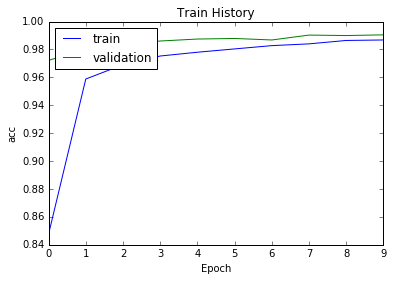

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
show_train_history(train_history,'acc','val_acc')

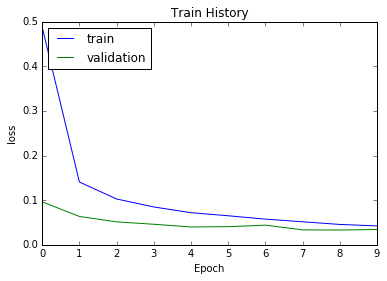

In [30]:
show_train_history(train_history,'loss','val_loss')

In [31]:
scores=model.evaluate(x_Test4D_normalize, y_TestOneHot)
scores[1]

 9984/10000 [============================>.] - ETA: 0s

0.99129999999999996

In [34]:
prediction=model.predict_classes(x_Test4D_normalize)

 9824/10000 [============================>.] - ETA: 0s

In [35]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

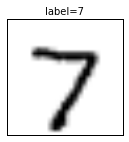

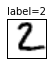

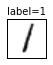

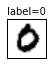

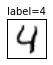

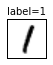

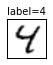

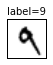

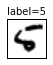

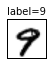

In [37]:
%matplotlib inline 
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show

%matplotlib inline
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig =plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
            ax=plt.subplot(5,5, 1+i)
            ax.imshow(images[idx], cmap='binary')
            title= "label=" +str(labels[idx])
            
            ax.set_title(title,fontsize=10)
            ax.set_xticks([]);ax.set_yticks([])
            idx+=1
            plt.show()
    
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

In [38]:
import pandas as pd
pd.crosstab(y_Test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,2,1,0,0
1,0,1130,1,0,0,1,1,1,1,0
2,1,0,1027,0,1,0,0,3,0,0
3,0,0,1,1008,0,0,0,1,0,0
4,0,0,0,0,973,0,1,0,1,7
5,1,0,0,6,0,882,2,0,0,1
6,5,2,0,1,1,1,947,0,1,0
7,0,2,4,2,0,0,0,1017,1,2
8,4,0,3,2,1,1,0,2,957,4
